# Enter Student Name & ID

In [63]:
student_id = 400101515  #@param {type:"integer"}
student_name = "Mahdi Tabatabaei" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400101515
your name: Mahdi Tabatabaei


## Part 1. Implementing Your Own PCA Function.

---



### 1.1 Complete the function below using only the `numpy` library.

In [ ]:
import numpy as np

In [54]:
def myPCA(X, num_components):
    # Step 1: Center the data (subtract the mean of each feature from the dataset)
    X_meaned = X - np.mean(X, axis=0)

    # Step 2: Compute the covariance matrix of the centered data
    cov_matrix = np.cov(X_meaned, rowvar=False)

    # Step 3: Perform eigenvalue decomposition on the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Step 4: Sort the eigenvalues and corresponding eigenvectors in descending order
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    # Step 5: Select the top 'num_components' eigenvectors
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]

    # Step 6: Transform the data using the top 'num_components' eigenvectors
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()

    return X_reduced, sorted_eigenvalues, eigenvector_subset

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [50]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

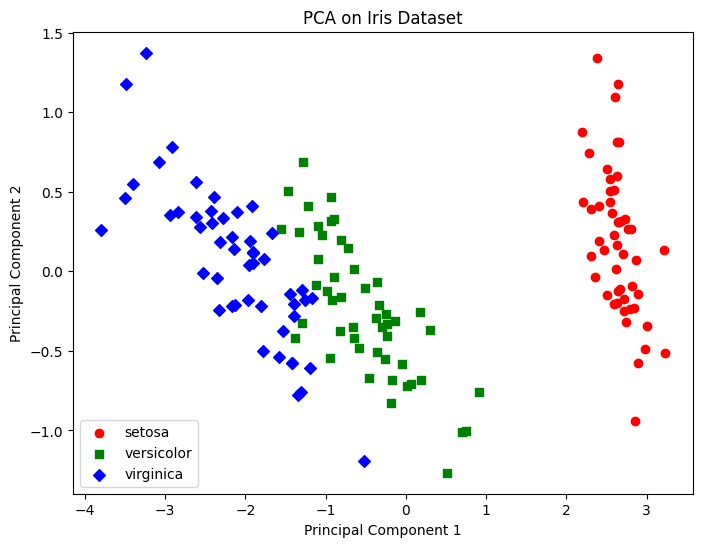

In [56]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA, reducing the dataset to 2 dimensions
num_components = 2
X_reduced, eigenvalues, eigenvectors = myPCA(X, num_components)

# Plotting the results
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']
labels = iris.target_names

for i in np.unique(y):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1],
                color=colors[i], marker=markers[i], label=labels[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.legend()
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.



### 2.1  Describe eigenfaces and how they are related to PCA.

### Eigenfaces and Their Relation to PCA

**Eigenfaces** are a set of eigenvectors used in the computer vision problem of human face recognition. They are derived through Principal Component Analysis (PCA) and are fundamental in understanding facial recognition and image compression tasks.

#### Image Representation:

- Each face image is represented as a high-dimensional vector. For instance, a grayscale image of size \(m \times n\) pixels is flattened into a vector in \(\mathbb{R}^{mn}\).

#### Dataset Preparation:

- Given a dataset of face images, we construct a matrix \(X\) where each row represents a vectorized form of a face image. If there are \(N\) images, \(X\) will be an \(N \times mn\) matrix.

#### Mean Subtraction:

- Center the data by subtracting the mean image (average of all images) from each image vector. This step ensures that the first principal component describes the direction of maximum variance.

#### Covariance Matrix Calculation:

- Compute the covariance matrix of the centered data matrix. This matrix captures the relationships (covariances) between all pixel pairs across the images.

#### Eigenvalue Decomposition:

- Perform eigenvalue decomposition on the covariance matrix to find its eigenvalues and eigenvectors. The eigenvectors (principal components) corresponding to the largest eigenvalues are the eigenfaces.

#### Principal Components:

- The principal components (eigenfaces) are orthogonal vectors that represent directions of maximum variance in the face image dataset.

### Steps to Compute Eigenfaces Using PCA

1. **Collect and Vectorize Face Images**:
   - Convert each face image into a vector and construct a data matrix where each row represents a face.

2. **Mean Centering**:
   - Subtract the mean image from each face vector to center the data around zero.

3. **Compute Covariance Matrix**:
   - Calculate the covariance matrix of the centered data matrix.

4. **Eigenvalue Decomposition**:
   - Compute the eigenvalues and eigenvectors of the covariance matrix.

5. **Select Top Eigenfaces**:
   - Choose the top \(k\) eigenvectors corresponding to the largest eigenvalues. These eigenvectors are the eigenfaces.

6. **Face Reconstruction and Recognition**:
   - Project new face images onto the eigenfaces to obtain their lower-dimensional representation. This representation is useful for tasks such as face recognition.


### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [ ]:
pip install opencv-python

In [ ]:
# !unzip FacesDataset1.zip

from zipfile import ZipFile
file_name = "FacesDataset1.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [58]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
        if img is not None:
            images.append(img)
    return images

def create_dataset(base_path):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    label = 0

    for person_folder in sorted(os.listdir(base_path)):
        person_path = os.path.join(base_path, person_folder)
        if os.path.isdir(person_path):
            images = load_images_from_folder(person_path)
            train_images = images[:5]  # First 5 images for training
            test_images = images[5:]   # Last 5 images for testing

            X_train.extend(train_images)
            X_test.extend(test_images)
            y_train.extend([label] * len(train_images))
            y_test.extend([label] * len(test_images))

            label += 1

    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

# Example usage:
base_path = "ORL"
X_train, X_test, y_train, y_test = create_dataset(base_path)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (200, 48, 48)
Test data shape: (200, 48, 48)
Training labels shape: (200,)
Test labels shape: (200,)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

Explained variance ratio of each component:
[0.32241721 0.11320795 0.08041185 0.05283178 0.0464043  0.03830935
 0.03198403 0.02516029 0.02089244 0.01950179 0.01806326 0.01528286
 0.0124081  0.01157541 0.01047482 0.00969075 0.00881892 0.00830489
 0.00746572 0.0069772  0.00636775 0.00607129 0.00589944 0.00570165
 0.00475853 0.00454697 0.0043459  0.00379566 0.00367224 0.0033483
 0.00321859 0.00308716 0.00283949 0.00282776 0.00269953 0.00256696
 0.00239187 0.00233367 0.00220554 0.00214376 0.00206167 0.00201603
 0.00194176 0.00185132 0.00172829]


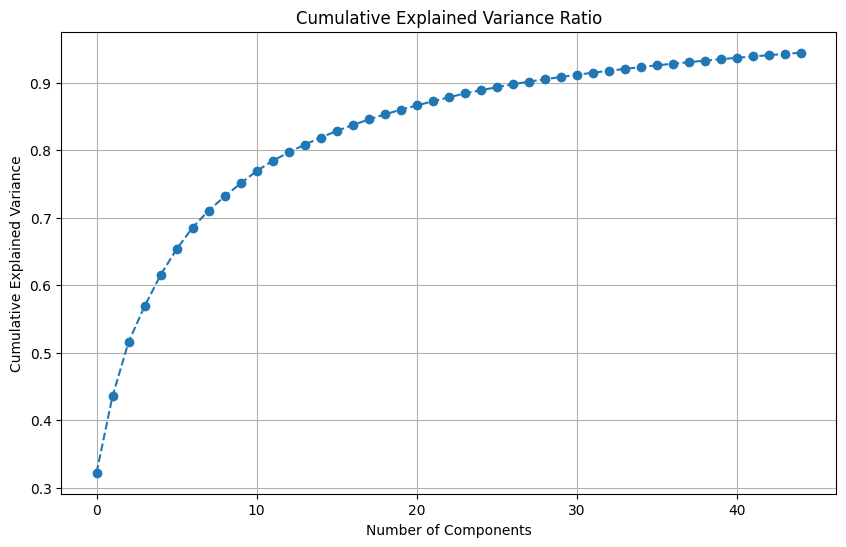

Original training data shape: (200, 2304)
Transformed training data shape: (200, 45)
Original test data shape: (200, 2304)
Transformed test data shape: (200, 45)


In [59]:
# Flatten the images
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Perform PCA using custom myPCA function
num_components = 45  # Number of components to keep
X_train_pca, eigenvalues, eigenvectors = myPCA(X_train_flattened, num_components)
X_test_pca = np.dot(X_test_flattened - np.mean(X_train_flattened, axis=0), eigenvectors)

# Calculate explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Print explained variance ratio
print("Explained variance ratio of each component:")
print(explained_variance_ratio[:num_components])

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio[:num_components]), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Print the shapes of the transformed data
print("Original training data shape:", X_train_flattened.shape)
print("Transformed training data shape:", X_train_pca.shape)
print("Original test data shape:", X_test_flattened.shape)
print("Transformed test data shape:", X_test_pca.shape)

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Train LDA classifier on the PCA-transformed training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred = lda.predict(X_test_pca)

# Report accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of LDA classifier on PCA-transformed data: {accuracy:.2f}")

Accuracy of LDA classifier on PCA-transformed data: 0.91


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


Number of components: 100, Accuracy: 0.94
Number of components: 90, Accuracy: 0.94
Number of components: 80, Accuracy: 0.92
Number of components: 70, Accuracy: 0.91
Number of components: 60, Accuracy: 0.91
Number of components: 50, Accuracy: 0.92
Number of components: 40, Accuracy: 0.93


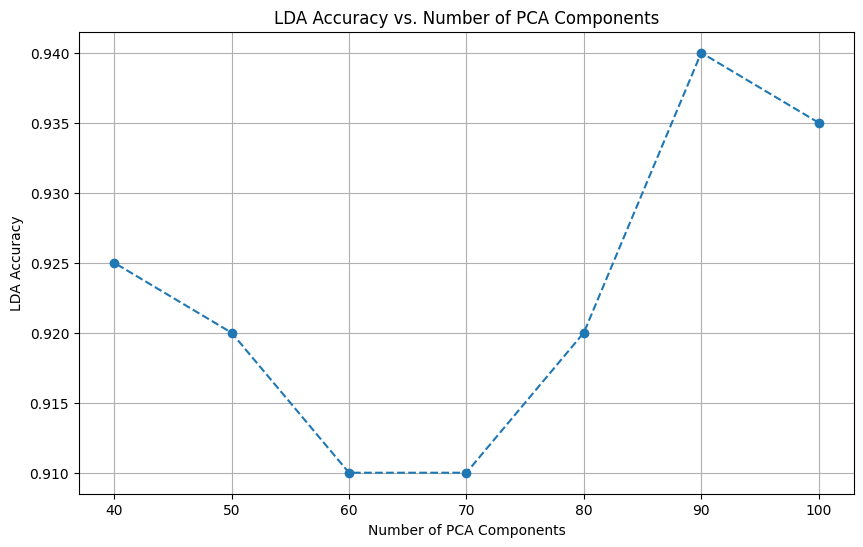

In [65]:
# Flatten the images
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Function to evaluate LDA accuracy for different PCA components
def evaluate_lda_accuracy(num_components_list):
    accuracies = []
    for num_components in num_components_list:
        # Perform PCA using custom myPCA function
        X_train_pca, eigenvalues, eigenvectors = myPCA(X_train_flattened, num_components)
        X_test_pca = np.dot(X_test_flattened - np.mean(X_train_flattened, axis=0), eigenvectors)

        # Train LDA classifier on the PCA-transformed training data
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train_pca, y_train)

        # Predict on the PCA-transformed test data
        y_pred = lda.predict(X_test_pca)

        # Report accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(f"Number of components: {num_components}, Accuracy: {accuracy:.2f}")

    return accuracies

# Evaluate LDA accuracy for different PCA components
num_components_list = list(range(100, 39, -10))
accuracies = evaluate_lda_accuracy(num_components_list)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(num_components_list, accuracies, marker='o', linestyle='--')
plt.title('LDA Accuracy vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('LDA Accuracy')
plt.grid(True)
plt.show()

All Results are good, but using 90 components would have better performance.